In [3]:
from ipywebrtc import CameraStream, ImageRecorder
from IPython.display import display
import PIL.Image
import io
import numpy
import cv2
from ipywebrtc import CameraStream
camera = CameraStream.facing_user(audio=False, constraints={
    'facing_mode': 'user',
    'audio': False,
    'video': { 'width': 512, 'height': 512 }
})
display(camera)
recorder = ImageRecorder(stream=camera)
display(recorder)

CameraStream(constraints={'facing_mode': 'user', 'audio': False, 'video': {'width': 512, 'height': 512, 'facin…

ImageRecorder(image=Image(value=b''), stream=CameraStream(constraints={'facing_mode': 'user', 'audio': False, …

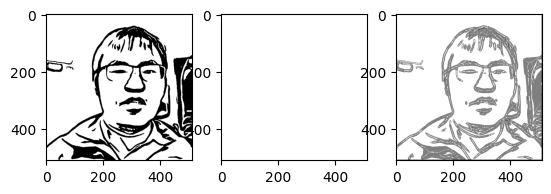

In [4]:
import draw_tools
image = numpy.array(PIL.Image.open(io.BytesIO(recorder.image.value)))[..., :3]
# 生成风格图像
im = draw_tools.generate_style_image(image)
# 获取轮廓列表
contour_list = draw_tools.getContourList(im, pen_width = 3, min_contour_len = 30,  is_show=True)

In [5]:
# 对轮廓列表进行排序
contour_list = draw_tools.sortContoursList(contour_list)
# 平滑拟合并采样轮廓
f_contour_list = draw_tools.sample_and_smooth_contours(im, contour_list, is_show=False)
# 保存轮廓点到文件中，每个轮廓占一行，x和y坐标用逗号分割，点之间用逗号分割
draw_tools.save_contour_points(f_contour_list, "../data/contour_data.txt")

In [6]:
import shutil
shutil.copy( "../data/contour_data.txt", "/home/robot/Work/system/bspline.txt")
import os
currdir = os.getcwd()
os.chdir('/home/ck/')

In [19]:
#1、执行./IGH_rc.sh，启动igh
#2、执行./runIGH.sh，开启通讯
#3、执行./runrobot.sh，运行画画程序
#4、执行./stoprobot.sh，关闭画画程序
#5、执行./runrobotoig.sh，运行运动程序，可在桌面程序上运动
#6、执行./stoprobotoig.sh，关闭运动程序
#7、执行./stopIGH.sh，关闭通讯

In [7]:
#1、执行./IGH_rc.sh，启动igh
os.system("./IGH_rc.sh")

Starting EtherCAT master 1.5.2  done


0

In [8]:
import time
#2、执行./runIGH.sh，开启通讯
os.system("./runIGH.sh")
time.sleep(5)
os.system("ps -ef | grep Master")

Failed to reserve master: Device or resource busy
root       38530       1  1 Dec06 ?        00:04:26 ./IgHEtherCATMaster --task run --file ./eni.xml --affinity 1
root      111117  110176  0 02:13 ?        00:00:00 sh -c ps -ef | grep Master
root      111119  111117  0 02:13 ?        00:00:00 grep Master


0

In [9]:
# 运行画画
# 3、执行./runrobot.sh，运行画画程序
# 4、执行./stoprobot.sh，关闭画画程序
# 5、执行./runrobotoig.sh，运行运动程序，可在桌面程序上运动
# 6、执行./stoprobotoig.sh，关闭运动程序
os.system("./runrobot.sh")
# os.system("./stoprobot.sh")
# os.system("./runrobotoig.sh")
# os.system("./stoprobotoig.sh")

0

============start robot control======================
start run time:20231207021353
verison: 11.4.6
Author: HanBing
Email: A994055925@163.com
Data file path: /home/ck/robot_config/data/
Start system initialize!
OUT SINGLE ABSOLUTE ENCOUDER(POSITION CLOSED LOOP)
group init existing problem. Some fields are not found!
dof num is 6
control:6,state:6,mode:0
ac_position:6,ac_velocity:0,ac_torque:0,ac_position2:0,ac_velocity2:0,ac_sensor_torque:0,ac_mode:0,ErrorCode:0,FollowingErrorActualValue:0
position:6,velocity:0,torque:0,VelocityOffset:0,TorqueOffset:0,TorqueMaxLimit:0,TorqueMinLimit:0
/////////////////////////////////////////////////////////////////
fd_ecat_in_name: /ecat_in
fd_ecat_out_name: /ecat_out
/////////////////////////////////////////////////////////////////
state: Status Word
control: Control word
mode: 
ac_position: Position actual value
ac_velocity: 
ac_torque: 
ac_position2: 
ac_velocity2: 
ac_sensor_torque: 
ac_mode: 
ErrorCode: 
FollowingErrorActualValue: 
position: Targ

/dev/mem: Bad address
/dev/mem: Bad address



Device is running
InitRobot
Hardware Match
printf_hardware_information: can't get cpuid
Hardware information: 
     cpuid:0000000000000000
     mac:128a5e84678d
init_robot_teach
set_robot_index
get_robot_num
set_addition_index
get_addition_num
get_robot_num
initialize finish
start Draw
power is finish!
150
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


In [14]:
#4、执行./stoprobot.sh，关闭画画程序
os.system("./stoprobot.sh")
os.system("./stoprobot.sh")
os.system("./stopIGH.sh")